In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../lesson1_pandas/data/telecom_churn.csv')

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True)

In [5]:
data['International plan'] = data['International plan'].map({'Yes':1, 'No':0})

In [6]:
data.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Выделяем из выборки матрицу ответов (y) и матрицу признаков (X). 

In [7]:
y = data['Churn'].astype('int')

In [8]:
X = data.drop('Churn', axis=1)

In [9]:
X.shape, y.shape

((3333, 17), (3333,))

Произведем разделение выборки на тренировочную и тестовую выборки.

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [12]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

Проводим обучение методом дерева решений с кроссвалидацией с разбиением на 5 частей (cv=5)

DecisionTreeClassifier - имеет следующие параметры: 
max_depth – максимальная глубина дерева;
max_features — максимальное число признаков, по которым ищется лучшее разбиение;
min_samples_leaf – минимальное число объектов в листе.

In [13]:
first_tree = DecisionTreeClassifier(random_state=17)

In [14]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.9143469 , 0.91220557, 0.92077088, 0.90772532, 0.91416309])

In [15]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
first_knn = KNeighborsClassifier()

In [18]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

Настраиваем параметры моделей (глубину дерева)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[0.5, 0.7, 1]}

In [21]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [22]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: user 155 ms, sys: 50.2 ms, total: 205 ms
Wall time: 1.92 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [23]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391366681677404, {'max_depth': 6, 'max_features': 0.7})

Подбираем параметры для метода ближайших соседей

In [24]:
knn_params = {'n_neighbors': [1,2,3,4] + list(range(50, 100, 10))}

In [25]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [26]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: user 1.43 s, sys: 11.8 ms, total: 1.44 s
Wall time: 1.48 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 50, 60, 70, 80, 90]})

In [27]:
knn_grid.best_score_, knn_grid.best_params_

(0.8658416887998456, {'n_neighbors': 4})

In [28]:
knn_params2 = {'n_neighbors': list(range(5,15))}

In [29]:
knn_grid2 = GridSearchCV(first_knn, knn_params2, cv=5)

In [30]:
%%time
knn_grid2.fit(X_train, y_train)

CPU times: user 1.34 s, sys: 643 µs, total: 1.34 s
Wall time: 1.34 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]})

In [31]:
knn_grid2.best_score_, knn_grid2.best_params_

(0.8731295549163228, {'n_neighbors': 9})

Попробуем на тестовой выборке

In [32]:
tree_valid_pred = tree_grid.predict(X_valid)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_valid, tree_valid_pred)

0.936

In [35]:
1-np.mean(y)

0.8550855085508551

In [36]:
from sklearn.tree import export_graphviz

In [37]:
export_graphviz(tree_grid.best_estimator_, out_file="telecom_tree2.dot", feature_names=X.columns, filled=True)

In [38]:
!ls -l

total 1272
-rw-r--r-- 1 lkst lkst 315155 мар  1 16:57 assignment03_decision_trees.ipynb
-rw-rw-r-- 1 lkst lkst 237676 мар  2 14:06 lesson3_2_classification.ipynb
-rw-r--r-- 1 lkst lkst  28192 мар  2 13:09 lesson3_classification.ipynb
-rw-r--r-- 1 lkst lkst  50500 мар  1 16:59 lesson3_practice_trees_titanic.ipynb
-rw-rw-r-- 1 lkst lkst   1624 мар  2 09:52 small_tree.dot
-rw-rw-r-- 1 lkst lkst 115589 мар  2 09:52 small_tree.png
-rw-r--r-- 1 lkst lkst   7921 мар  2 14:52 telecom_tree2.dot
-rw-rw-r-- 1 lkst lkst 528621 мар  1 18:22 telecom_tree2.png


In [39]:
!dot -Tpng telecom_tree2.dot -o telecom_tree2.png

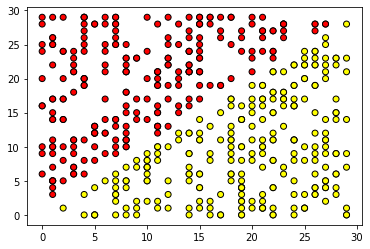

In [42]:
def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');